# Project 1

In [1]:
import numpy as np
import sklearn as sk
import gensim
import nltk

## 1 - Dataset Preparation & Analysis

### 1.2 - Loading Dataset

In [2]:
import json

with open('goemotions.json') as f:
	dataset = np.array(json.load(f))
	
print(len(dataset))

171820


### 1.3 Find Distribution

In [4]:
import matplotlib.pyplot as plt
import savefig

Splitting the information.

In [5]:
posts = dataset[:, 0]
emotions = dataset[:, 1]
sentiments = dataset[:, 2]

In [6]:
emotionsSet = np.unique(emotions, return_counts=True)
sentimentsSet = np.unique(sentiments, return_counts=True)

Plotting figures.

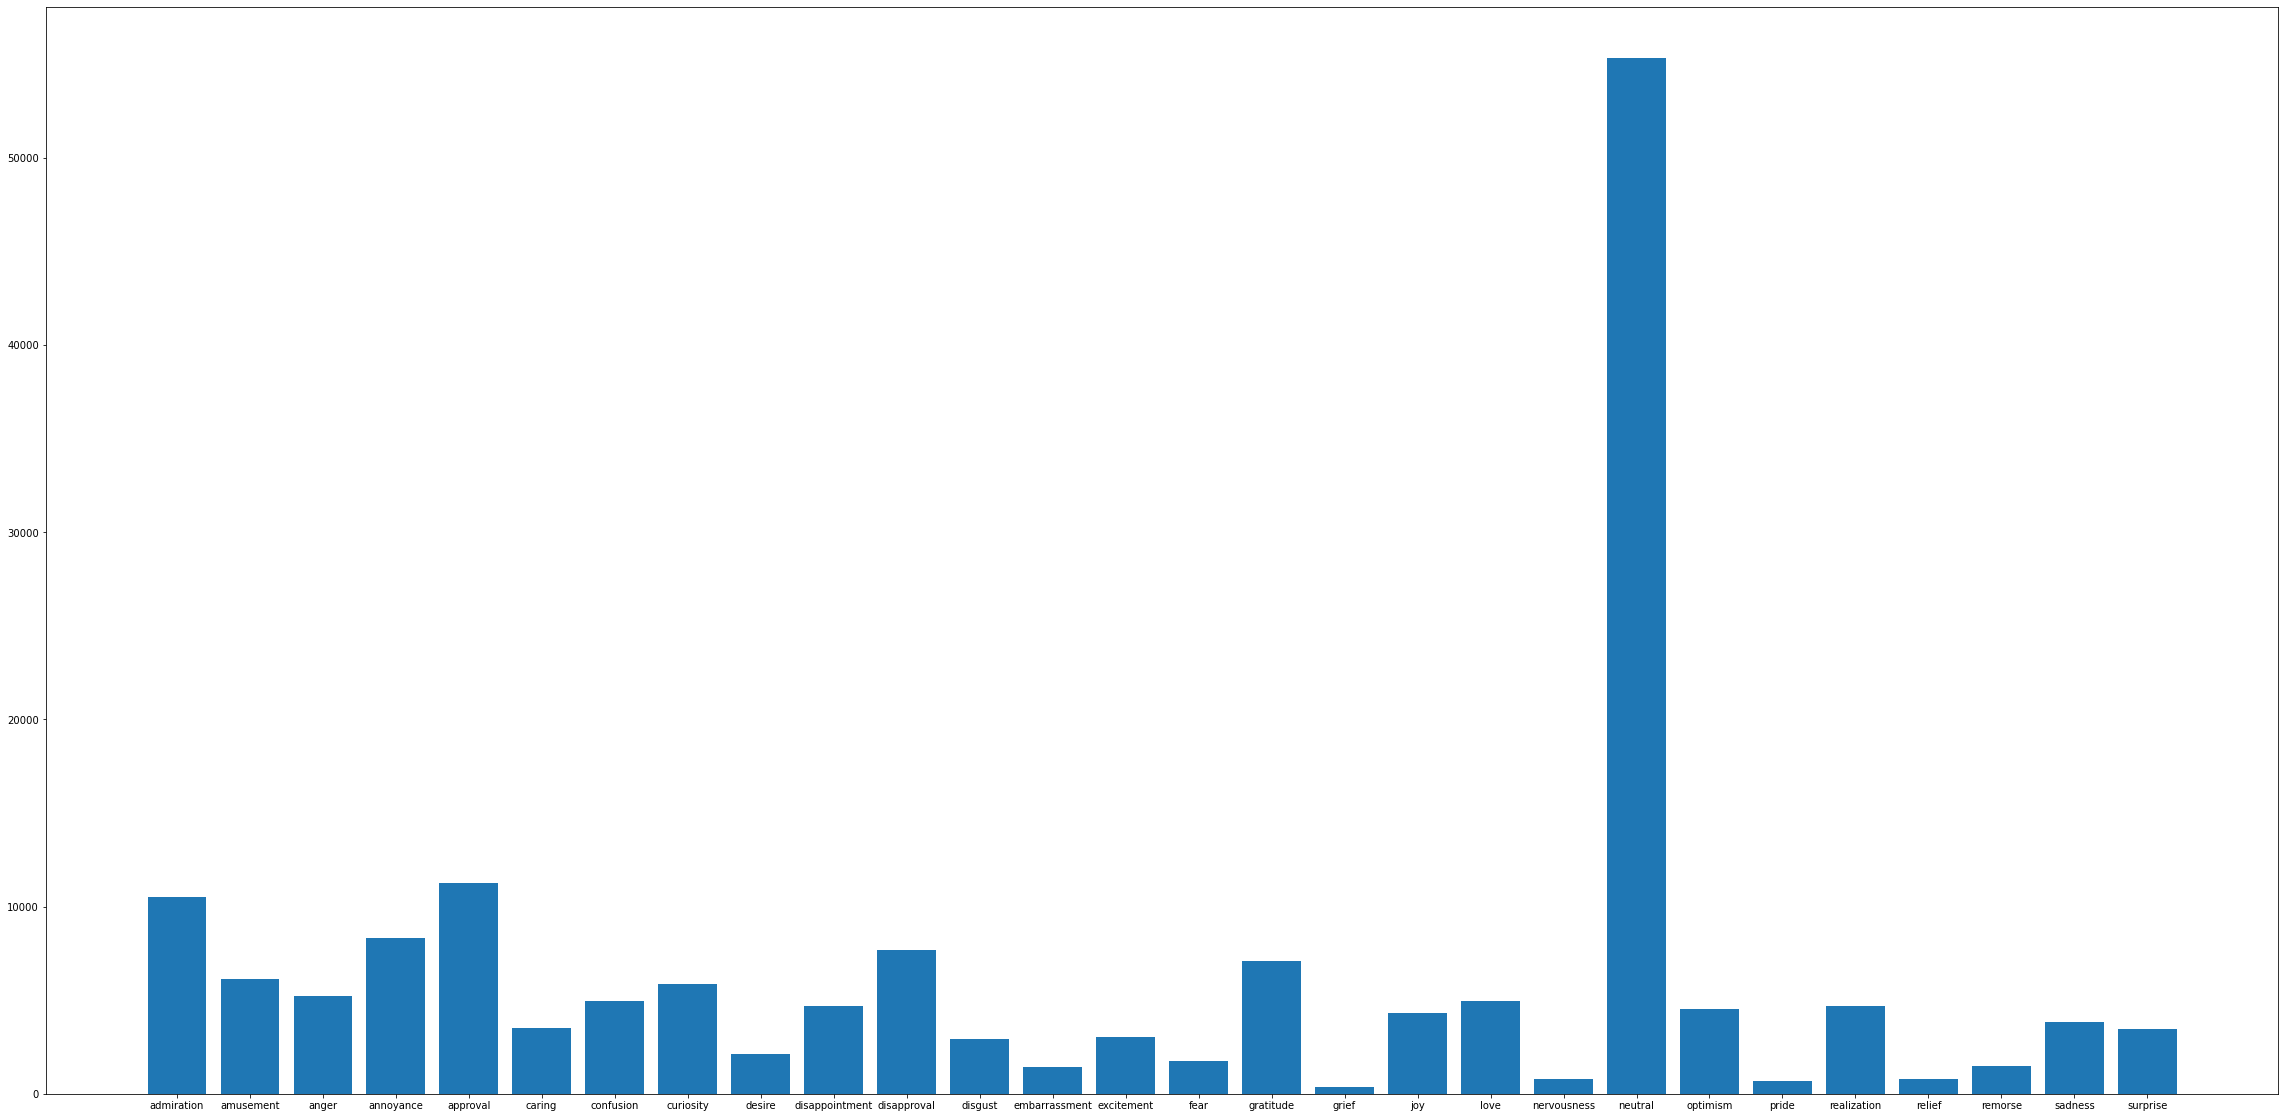

In [7]:
plt.figure(figsize=(40,20))
plt.bar(emotionsSet[:][0], emotionsSet[:][1])
plt.savefig("emotions.pdf", dpi=150)

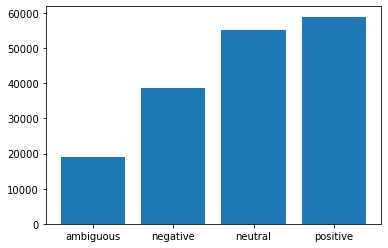

In [8]:
plt.bar(sentimentsSet[:][0], sentimentsSet[:][1])
plt.savefig("sentiments.pdf", dpi=150)

## 2 - Words as Features

### 2.1 - Extraction

In [9]:
vectorizer = sk.feature_extraction.text.CountVectorizer()
vectorizedPosts = vectorizer.fit_transform(posts)

Now that scikit learn has tokenized the corpus, we can extract the feature names which corresponds to the vocabulary.

In [10]:
vocabularySize = len(vectorizer.get_feature_names_out())
vocabularySize

30449

In [11]:
vectorizedPosts.shape

(171820, 30449)

### 2.2 - Split For Training And Testing

We are first going to need to convert our sentiments and emotions into numerical values.

In [12]:
from sklearn import preprocessing
emotionsLabelEncoder = preprocessing.LabelEncoder()
sentimentsLabelEncoder = preprocessing.LabelEncoder()

In [13]:
encodedEmotions = emotionsLabelEncoder.fit_transform(emotions)
encodedSentiments = sentimentsLabelEncoder.fit_transform(sentiments)

We can double-check that everything was correctly encoded.

In [14]:
print(f"Number of emotions: {len(emotionsLabelEncoder.classes_)}")
print(f"Number of sentiments: {len(sentimentsLabelEncoder.classes_)}")

Number of emotions: 28
Number of sentiments: 4


We can now split the information for training and testing.

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
postsForEmotions_train, postsForEmotions_test, emotions_train, emotions_test =  train_test_split(vectorizedPosts, encodedEmotions, test_size=0.20)

In [17]:
postsForSentiments_train, postsForSentiments_test, sentiments_train, sentiments_test =  train_test_split(vectorizedPosts, encodedSentiments, test_size=0.20)

### 2.3 - Training And Testing (AKA The Fun Part)

#### 2.3.1 - Base Multinomial Naive Bayes

In [18]:
from sklearn.naive_bayes import MultinomialNB
baseMNBClassifier_emotions = MultinomialNB()
baseMNBClassifier_sentiments = MultinomialNB()

Fitting and predicting emotions.

In [19]:
baseMNBClassifier_emotions.fit(postsForEmotions_train, emotions_train)

MultinomialNB()

In [20]:
baseMNB_emotions_results = baseMNBClassifier_emotions.predict(postsForEmotions_test)

Creating function for easy testing.

In [42]:
def testAccuracy(predictedResults, actualResults):
    counter = 0
    for i in range(len(predictedResults)):
        if predictedResults[i] == actualResults[i]:
            counter += 1
    return counter/len(predictedResults)

In [47]:
print(f"Accuracy: {testAccuracy(baseMNB_emotions_results, emotions_test)}")

Accuracy: 0.39078686998021184


Fitting and predicting sentiments.

In [23]:
baseMNBClassifier_sentiments.fit(postsForSentiments_train, sentiments_train)

MultinomialNB()

In [40]:
baseMNB_sentiments_results = baseMNBClassifier_sentiments.predict(postsForSentiments_test)

In [46]:
print(f"Accuracy: {testAccuracy(baseMNB_sentiments_results, sentiments_test)}")

Accuracy: 0.5439122337329764


#### 2.3.2 - Base Decision Tree

In [29]:
from sklearn import tree
baseDTClassifier_emotions = tree.DecisionTreeClassifier()
baseDTClassifier_sentiments = tree.DecisionTreeClassifier()

Fitting and testing emotions.

In [31]:
baseDTClassifier_emotions.fit(postsForEmotions_train, emotions_train)
baseDT_emotions_results = baseDTClassifier_emotions.predict(postsForEmotions_test)

In [49]:
print(f"Accuracy: {testAccuracy(baseDT_emotions_results, emotions_test)}")

Accuracy: 0.36314165987661506


Fitting and testing sentiments.

In [33]:
baseDTClassifier_sentiments.fit(postsForSentiments_train, sentiments_train)
baseDT_sentiments_results = baseDTClassifier_sentiments.predict(postsForSentiments_test)

In [52]:
print(f"Accuracy: {testAccuracy(baseDT_sentiments_results, sentiments_test)}")

Accuracy: 0.5442614363869165


#### 2.3.3 - Base Multi-Layered Perceptron

In [63]:
from sklearn import neural_network
baseMLPClassifier_emotions = neural_network.MLPClassifier()
baseMLPClassifier_sentiments = neural_network.MLPClassifier()

Fitting and testing emotions.

In [59]:
baseMLPClassifier_emotions.fit(postsForEmotions_train, emotions_train)
baseMLP_emotions_results = baseMLPClassifier_emotions.predict(postsForEmotions_test)

C:\Users\subha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
print(f"Accuracy: {testAccuracy(baseMLP_emotions_results, emotions_test)}")

Fitting and testing sentiments.

In [62]:
baseMLPClassifier_sentiments.fit(postsForSentiments_train, sentiments_train)
baseMLP_sentiments_results = baseMLPClassifier_sentiments.predict(postsForSentiments_test)

C:\Users\subha\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:699: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [ ]:
print(f"Accuracy: {testAccuracy(baseMLP_sentiments_results, sentiments_test)}")

#### 2.3.4 - Top Multinomial Bayes Classifier